In [1]:
import requests
import numpy as np
import pandas as pd
import requests
import json
import time
from datetime import datetime
from datetime import timedelta
from collections import Counter

  #https://docs.reservoir.tools/reference/geteventsasksv3
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
mfer_trait[mfer_trait['nft.identifier']>10000]

trait_type,nft.identifier,1/1,4:20 watch,background,beard,chain,eyes,hat over headphones,hat under headphones,headphones,long hair,mouth,shirt,short hair,smoke,type
10001,10001,NaN,NaN,orange,NaN,NaN,regular eyes,NaN,NaN,white headphones,long hair black,flat,collared shirt pink,NaN,cig black,plain mfer
10002,10002,NaN,sub blue,blue,NaN,NaN,purple shades,NaN,NaN,black headphones,NaN,smile,hoodie down white,messy yellow,cig white,plain mfer
10003,10003,NaN,NaN,yellow,NaN,NaN,regular eyes,NaN,NaN,blue headphones,NaN,smile,NaN,NaN,cig black,plain mfer
10004,10004,NaN,sub black,yellow,full beard,NaN,eye mask,NaN,NaN,pink headphones,NaN,smile,NaN,mohawk pink,cig black,plain mfer
10005,10005,NaN,sub blue,green,NaN,NaN,shades,NaN,NaN,red headphones,NaN,smile,NaN,NaN,cig white,charcoal mfer
10006,10006,NaN,sub blue,blue,NaN,NaN,shades,NaN,NaN,pink headphones,NaN,smile,hoodie down red,NaN,cig black,charcoal mfer
10007,10007,NaN,sub turquoise,red,NaN,NaN,regular eyes,NaN,NaN,pink headphones,NaN,smile,collared shirt yellow,mohawk green,pipe,plain mfer
10008,10008,NaN,sub turquoise,red,NaN,NaN,regular eyes,NaN,NaN,black headphones,NaN,flat,collared shirt turquoise,mohawk yellow,NaN,plain mfer
10009,10009,NaN,sub lantern (green),yellow,NaN,NaN,regular eyes,NaN,NaN,red headphones,long hair black,flat,NaN,NaN,cig black,plain mfer
10010,10010,NaN,NaN,yellow,NaN,NaN,regular eyes,NaN,NaN,black headphones,NaN,smile,collared shirt white,mohawk blue,cig black,plain mfer


###Mfer traits

In [ ]:
#The first script
url = "https://api.opensea.io/api/v2/chain/ethereum/contract/0x79fcdef22feed20eddacbb2587640e45491b757f/nfts/10020"
headers = {
    "accept": "application/json",
    "x-api-key": api
}
r = requests.get(url, headers=headers)
json_data = json.loads(r.text)
df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries

In [7]:
mfer_trait['type'].value_counts()

type
plain mfer       5916
charcoal mfer    3958
zombie mfer        89
ape mfer           28
alien mfer          9
Name: count, dtype: int64

In [6]:
df

,trait_type,display_type,max_value,trait_count,order,value,nft.identifier
0,eyes,None,None,7254,None,regular eyes,10020
1,mouth,None,None,7936,None,smile,10020
2,headphones,None,None,3949,None,black headphones,10020
3,background,None,None,1974,None,green,10020
4,type,None,None,3958,None,charcoal mfer,10020
5,smoke,None,None,3735,None,cig white,10020
6,4:20 watch,None,None,1459,None,sub red,10020
7,chain,None,None,395,None,silver chain,10020


In [ ]:
#Original function, to make 
#df_all= pd.Series([])
#null_mayc = []
for i in range(10010,10040):
    print(i)
    url = 'https://api.opensea.io/api/v2/chain/ethereum/contract/0x79fcdef22feed20eddacbb2587640e45491b757f/nfts/'+f'{i}'
    headers = {
    "accept": "application/json",
    "x-api-key": api
    }
    r = requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    time.sleep(0.5)
    
    try:
        df = pd.json_normalize(json_data, record_path=['nft', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
        df_all = pd.concat([df_all, df])
    except KeyError:
           continue

In [34]:
df_all.drop_duplicates(inplace=True)

In [35]:
mfer_trait = pd.pivot(df_all, columns='trait_type', index='nft.identifier', values= 'value')

In [36]:
mfer_trait.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10021 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   1/1                   21 non-null     object
 1   4:20 watch            7635 non-null   object
 2   background            10000 non-null  object
 3   beard                 1036 non-null   object
 4   chain                 490 non-null    object
 5   eyes                  10000 non-null  object
 6   hat over headphones   466 non-null    object
 7   hat under headphones  2956 non-null   object
 8   headphones            9942 non-null   object
 9   long hair             2591 non-null   object
 10  mouth                 10000 non-null  object
 11  shirt                 4414 non-null   object
 12  short hair            1823 non-null   object
 13  smoke                 8292 non-null   object
 14  type                  10000 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


In [41]:
mfer_trait = mfer_trait.reset_index()

In [49]:
mfer_trait['nft.identifier'] = pd.to_numeric(mfer_trait['nft.identifier'])
mfer_trait.sort_values('nft.identifier',inplace=True)
mfer_trait.index=range(len(mfer_trait))


Stored 'mfer_trait' (DataFrame)


In [73]:
mfer_trait

trait_type,nft.identifier,1/1,4:20 watch,background,beard,chain,eyes,hat over headphones,hat under headphones,headphones,long hair,mouth,shirt,short hair,smoke,type
0,0,NaN,NaN,red,NaN,NaN,regular eyes,NaN,knit buffalo,black headphones,NaN,smile,NaN,NaN,cig black,plain mfer
1,1,NaN,sub red,red,NaN,NaN,nerd glasses,NaN,bandana dark gray,white headphones,NaN,smile,collared shirt blue,NaN,NaN,charcoal mfer
2,2,NaN,sub bat (blue/black),orange,NaN,NaN,regular eyes,NaN,headband green/white,pink headphones,long hair black,smile,NaN,NaN,cig black,charcoal mfer
3,3,NaN,sub red,graveyard,full beard,NaN,zombie eyes,NaN,beanie,white headphones,NaN,smile,NaN,NaN,cig black,zombie mfer
4,4,NaN,sub lantern (green),green,NaN,NaN,regular eyes,NaN,NaN,white headphones,NaN,smile,NaN,mohawk blue,cig white,plain mfer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10016,10016,NaN,sub red,green,NaN,NaN,regular eyes,NaN,NaN,lined headphones,NaN,smile,NaN,mohawk yellow,cig black,plain mfer
10017,10017,NaN,argo black,orange,NaN,NaN,regular eyes,NaN,NaN,green headphones,long hair black,flat,NaN,NaN,cig black,plain mfer
10018,10018,NaN,sub turquoise,blue,NaN,NaN,shades,NaN,NaN,white headphones,NaN,flat,NaN,NaN,NaN,charcoal mfer
10019,10019,NaN,sub black,blue,NaN,silver chain,regular eyes,NaN,NaN,black headphones,NaN,flat,NaN,mohawk purple,cig white,charcoal mfer


In [15]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=mfer_trait['nft.identifier'],nbinsx=20))
fig.update_layout(title='Distribution of Mfer token ID',
                   xaxis_title='Token ID',
                   width =900, height = 600, bargap= 0.1)
fig.show()

#Mfer event

In [14]:
%store -r mfer_trait

In [16]:
len(mfer_trait['nft.identifier'].unique())

10021

In [12]:
num = list(range(2220,2230))
contract = '0x79fcdef22feed20eddacbb2587640e45491b757f'
headers = {
    "accept": "*/*",
    "x-api-key": event_api
}
""" url = "https://api.reservoir.tools/sales/v6?tokens=0x79fcdef22feed20eddacbb2587640e45491b757f%3A394"

headers = {
    "accept": "*/*",
    "x-api-key": "6270fbfb-d539-5f94-808f-af868ffb1f95"
}

r = requests.get(url, headers=headers)
json_data = json.loads(r.text)
df_loop = pd.json_normalize(json_data, record_path=['sales']) """
#Function need
def get_sales(num):
    print(num, f'Time: {datetime.now().isoformat(timespec="seconds")}')
    url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])+ '&limit=1000'
    r= requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales'])
    df_continue = pd.json_normalize(json_data) # this parameter adjust to new queries
    
    #followup if the continue is not null
    while df_continue.loc[0]['continuation']:
        continuation = df_continue.loc[0]['continuation']
        url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])+ '&limit=1000'+'&continuation='+ f'{continuation}'
        r = requests.get(url, headers=headers)
        
        json_data = json.loads(r.text)
        #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
        df_loop_continue = pd.json_normalize(json_data, record_path=['sales'])
        df_continue = pd.json_normalize(json_data)
        df_loop = pd.concat([df_loop, df_loop_continue])
    
    return df_loop

In [ ]:
url = "https://api.reservoir.tools/sales/v6?tokens=0x79fcdef22feed20eddacbb2587640e45491b757f%3A111&limit=2&continuation=MTY3MzgzMjQ0M18xNDBfMV8xMzY2ODAwMDAwMDAwMDAwMDAw"


In [17]:
df = pd.Series([])

In [ ]:
""" for i in list(range(0, 10)):
    num= list(range(i*10,i*10+10))
    print(num)
    url = "https://api.reservoir.tools/sales/v6?"+'&'.join([f'tokens={contract}%3A{str(i)}' for i in num])
    r= requests.get(url, headers=headers)
    json_data = json.loads(r.text)
    #df = pd.json_normalize(json_data, record_path=['sales', 'traits'], meta= [['nft','identifier']]) # this parameter adjust to new queries
    df_loop = pd.json_normalize(json_data, record_path=['sales']) # this parameter adjust to new queries
    df=pd.concat([df，df_loop])
     """
#Formal Loop
for i in list(range(1001,1200)):
    #num= list(range(i*10,i*10+10))
    num = mfer_trait['nft.identifier'].loc[i*10:i*10+10]
    df_loop = get_sales(num)
    if len(df_loop) ==0: #Some tokens do not have trading yet
        continue
    elif len(df_loop) >1000:
        break
    else:
        df=pd.concat([df,df_loop])
        time.sleep(0.5)


In [34]:
df=pd.concat([df,df_loop])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66529 entries, 0 to 0
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   0                        0 non-null      object 
 1   id                       66529 non-null  object 
 2   saleId                   66529 non-null  object 
 3   orderId                  55628 non-null  object 
 4   orderSource              55822 non-null  object 
 5   orderSide                66529 non-null  object 
 6   orderKind                66529 non-null  object 
 7   from                     66529 non-null  object 
 8   to                       66529 non-null  object 
 9   amount                   66529 non-null  object 
 10  fillSource               55828 non-null  object 
 11  block                    66529 non-null  float64
 12  txHash                   66529 non-null  object 
 13  logIndex                 66529 non-null  float64
 14  batchIndex               66529 

In [ ]:
df['token.tokenId']

In [37]:
mfer_event = df.copy()

In [39]:
mfer_event['token.tokenId'] = pd.to_numeric(mfer_event['token.tokenId'])
mfer_event['timestamp'] = pd.to_datetime(mfer_event['timestamp'], unit='s')
mfer_event.index = range(len(mfer_event))
mfer_event.index
mfer_event_raw = mfer_event.copy()

In [42]:
mfer_event = mfer_event_raw[['orderSide','orderSource','orderKind','from', 'to','block', 'txHash', 'timestamp',
           'washTradingScore','token.contract','token.tokenId','price.currency.symbol','price.amount.decimal', 'price.amount.usd']]
mfer_event['price.currency.symbol'].value_counts()
mfer_event.drop_duplicates(inplace=True)
%store mfer_event_raw
%store mfer_event

Stored 'mfer_event_raw' (DataFrame)
Stored 'mfer_event' (DataFrame)


Mfer general analysis

In [2]:
%store -r mfer_trait mfer_event

In [53]:
mfer_event.describe()

,block,timestamp,washTradingScore,token.tokenId,price.amount.decimal,price.amount.usd
count,6.085700e+04,60857,60857.000000,60857.000000,60857.000000,60857.000000
mean,1.509009e+07,2022-06-26 19:43:37.358315520,0.029627,5053.668189,1.229862,2917.327802
min,1.371715e+07,2021-11-30 21:19:39,0.000000,1.000000,0.000000,0.000000
25%,1.373941e+07,2021-12-04 10:53:15,0.000000,2606.000000,0.209000,811.496280
50%,1.429193e+07,2022-02-28 02:24:53,0.000000,5012.000000,0.870000,1579.746210
75%,1.666253e+07,2023-02-19 12:07:35,0.000000,7519.000000,1.480000,2635.307960
max,1.872759e+07,2023-12-06 13:29:23,1.000000,10020.000000,500.220000,606176.381300
std,1.463677e+06,NaN,0.169557,2828.851822,4.385768,6762.772500


In [52]:
a = pd.DataFrame(mfer_event['orderSource'].value_counts())
a.reset_index(inplace=True)
a.sort_values('count' ,ascending=False)

,orderSource,count
0,opensea.io,32873
1,blur.io,14986
2,looksrare.org,1240
3,element.market,1157
4,x2y2.io,501
5,nftx.io,183
6,sudoswap.xyz,109
7,gem.xyz,57
8,reservoir.tools,7
9,rarible.com,5


In [89]:
#Make a pie chart according to source
a = mfer_event['orderSource'].value_counts()
c = pd.Series(sum(a[4:]), index= ['others']) #Create a new
b = a[:4].add(c, fill_value=0).sort_values(ascending=False)
labels= b.index
values= b
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title_text = "Mfers trades in NFT marketplaces", width =500, height = 400)
fig.show()

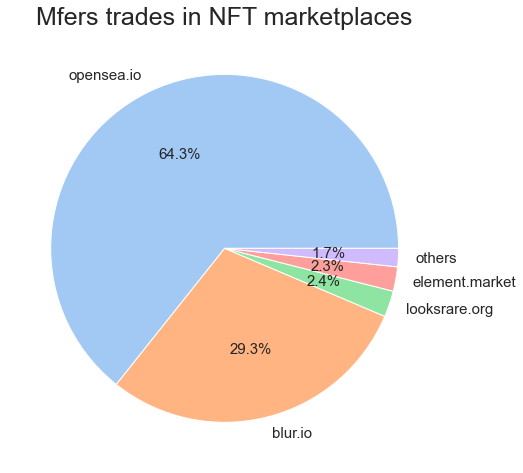

In [88]:
#Opensea is still the 
sns.set_theme(style="whitegrid", palette="pastel")
fig = plt.figure(1, figsize=(8,8))
ax = fig.add_subplot()
ax.pie(b ,labels=labels, autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('Mfers trades in NFT marketplaces', fontsize = 25)
plt.show()

In [56]:
mfer = mfer_event.merge(mfer_trait, how='left', left_on='token.tokenId', right_index= True )

In [57]:
mfer['orderKind'].value_counts()

orderKind
wyvern-v2           18330
blur                13026
mint                 9721
wyvern-v2.3          7826
seaport              3819
seaport-v1.5         2106
blur-v2              1960
looks-rare           1217
element-erc721       1157
seaport-v1.4          863
x2y2                  501
nftx                  183
sudoswap              109
looks-rare-v2          23
zeroex-v4-erc721        7
rarible                 5
okex                    3
alienswap               1
Name: count, dtype: int64

In [58]:
mfer_event.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd'],
      dtype='object')

In [86]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=mfer[mfer['orderKind']== 'mint']['timestamp'],nbinsx= 10))
fig.update_layout(title_text = "Mfers mint date", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Mint date', yaxis_title_text='Mint count',
                  barmode = 'stack'
                  )
fig.show()

<ipython-input-87-d43a464c70dd>:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(18961.88888888889, 0, '30 21:20'),
 Text(18961.89236111111, 0, '30 21:25'),
 Text(18961.895833333332, 0, '30 21:30')]

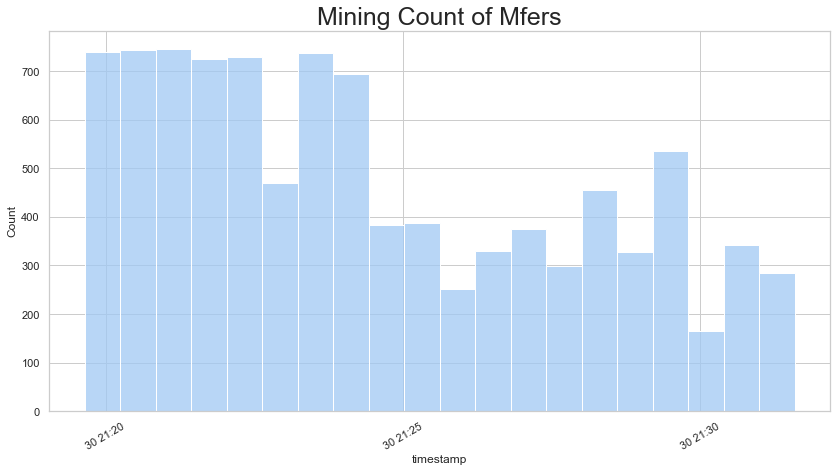

In [87]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(14,7))
a = sns.histplot(data = mfer, x=mfer[mfer['orderKind']== 'mint']['timestamp'], bins=20)
plt.title('Mining Count of Mfers', fontsize = 25)
a.set_xticklabels(a.get_xticklabels() ,rotation=30)


In [85]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=mfer[mfer['orderKind'] != 'mint']['timestamp'],nbinsx=40))
fig.update_layout(title_text = "Mfers transaction count", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Transaction date', yaxis_title_text='trade count',
                  barmode = 'stack'
                  )
fig.show()

In [68]:
pd.Series([i.week for i in mfer['timestamp']]).head()

0    48
1    14
2    45
3    49
4    45
dtype: int64

In [79]:
mfer['price.currency.symbol'].value_counts() #All trades with ETH and WETH

price.currency.symbol
ETH     57097
WETH     3760
Name: count, dtype: int64

In [71]:
mfer['month'] =mfer['timestamp'].dt.to_period('m')

In [74]:
mfer.columns

Index(['orderSide', 'orderSource', 'orderKind', 'from', 'to', 'block',
       'txHash', 'timestamp', 'washTradingScore', 'token.contract',
       'token.tokenId', 'price.currency.symbol', 'price.amount.decimal',
       'price.amount.usd', 'nft.identifier', '1/1', '4:20 watch', 'background',
       'beard', 'chain', 'eyes', 'hat over headphones', 'hat under headphones',
       'headphones', 'long hair', 'mouth', 'shirt', 'short hair', 'smoke',
       'type', 'month'],
      dtype='object')

In [ ]:
week = pd.Series([i.week for i in mfer['timestamp']])
year = pd.Series([i.year for i in mfer['timestamp']])
mfer['week_yr'] = pd.to_datetime(year.astype(str) + ' ' + week.astype(str) + ' 1',
                                format='%Y %U %w')

In [74]:
#mfer['month'] =mfer['timestamp'].dt.to_period('m')
mfer['price.currency.symbol'].value_counts()
linechart = mfer[['week_yr','price.amount.decimal']].groupby(by = 'week_yr', as_index=False).mean()
linechart.head()

,week_yr,price.amount.decimal
0,2021-11-29,0.176503
1,2021-12-06,0.251137
2,2021-12-13,0.114464
3,2021-12-20,0.129693
4,2021-12-27,0.122192


In [39]:
linechart['week_yr'] = linechart['week_yr'].astype(str)
fig = px.line(linechart, x="week_yr", y="price.amount.decimal", markers= True)
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='Mfers weekly average price in ETH',
                   xaxis_title='Week',
                   yaxis_title='ETH')
fig.show()

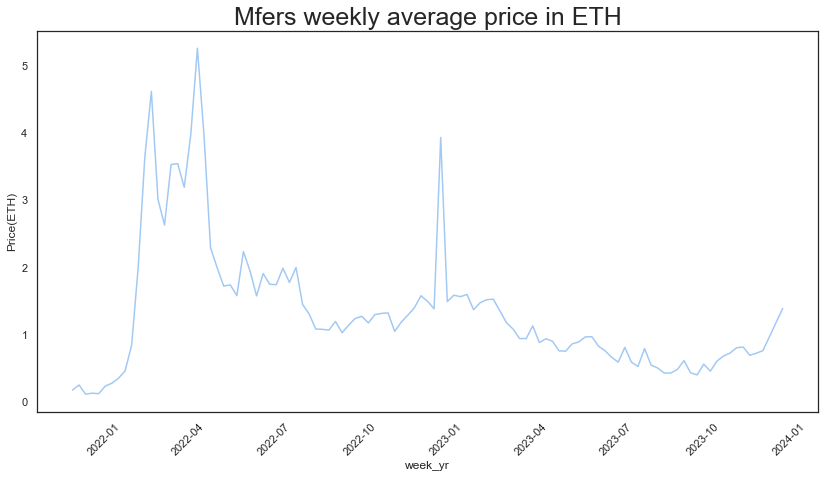

In [75]:
sns.set_theme(style="white", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(linechart, x='week_yr', y='price.amount.decimal', markers= True)
a.set(ylabel='Price(ETH)')
plt.title('Mfers weekly average price in ETH', fontsize =25)
#a.set_xticklabels(a.get_xticklabels() ,rotation=30)
a.tick_params(axis='x', labelrotation = 45)

Stored 'mfer' (DataFrame)


Price analysis of Mfers (Separate by traits)

In [3]:
%store -r mfer

In [4]:
#Need to separate mfers to precious mfers (zombie, ape and alien mfer)
mfer['type'].value_counts()

type
plain mfer       33988
charcoal mfer    26356
zombie mfer        341
ape mfer            87
alien mfer          25
Name: count, dtype: int64

In [20]:
a =pd.Series(np.repeat(np.nan, len(mfer)))
for i in range(len(mfer)):
    if mfer['type'].loc[i] == 'plain mfer':
        a.loc[i] = 'plain mfer'
    elif mfer['type'].loc[i] == 'charcoal mfer':
        a.loc[i] = 'charcoal mfer'
    else:
        a.loc[i] = 'rare mfer'

<ipython-input-20-5b7329b53fe4>:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'plain mfer' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [21]:
mfer['mfers_type'] = a
mfer['mfers_type'].value_counts()

mfers_type
plain mfer       33988
charcoal mfer    26356
rare mfer          513
Name: count, dtype: int64

In [34]:
week = pd.Series([i.week for i in mfer['timestamp']])
year = pd.Series([i.year for i in mfer['timestamp']])
mfer['week_yr'] = pd.to_datetime(year.astype(str) + ' ' + week.astype(str) + ' 1',
                                format='%Y %U %w')

In [59]:
#All Mfers transaction are in ETH and WETH
linechart = mfer[['week_yr','mfers_type','price.amount.decimal']].groupby(by = ['week_yr','mfers_type'], as_index=False).mean()
linechart['week_yr'] = linechart['week_yr'].astype(str)
linechart.head()

,week_yr,mfers_type,price.amount.decimal
0,2021-11-29,charcoal mfer,0.148289
1,2021-11-29,plain mfer,0.148283
2,2021-11-29,rare mfer,1.666530
3,2021-12-06,charcoal mfer,0.225784
4,2021-12-06,plain mfer,0.225329


In [52]:
mfer_trait['type'].value_counts()

type
plain mfer       5916
charcoal mfer    3958
zombie mfer        89
ape mfer           28
alien mfer          9
Name: count, dtype: int64

In [57]:
linechart['week_yr'] = linechart['week_yr'].astype(str)
fig = px.line(linechart, x="week_yr", y="price.amount.decimal", markers= False, color= 'mfers_type')
#fig = px.line(linechart, x="month", y="price.amount.usd", text = 'month')
fig.update_traces(textposition="bottom right")
fig.update_layout(title='Mfers weekly average price in ETH (Separated in groups)',
                   xaxis_title='week',
                   yaxis_title='ETH')
fig.show()

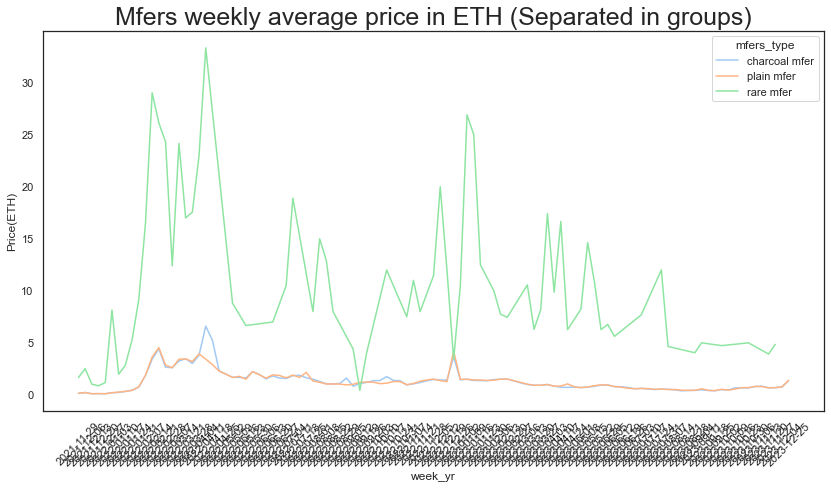

In [68]:
sns.set_theme(style="white", palette="pastel")
plt.figure(figsize=(14,7))
#a = sns.lineplot(box_group, x='Month_year', y='price',hue='marketplace_event_type')
a = sns.lineplot(linechart, x='week_yr', y='price.amount.decimal', markers= True, hue='mfers_type')
a.set(ylabel='Price(ETH)')
plt.title('Mfers weekly average price in ETH (Separated in groups)', fontsize =25)
#a.set_xticklabels(a.get_xticklabels() ,rotation=30)
a.tick_params(axis='x', labelrotation = 45)

In [25]:
mfer['orderSource'].value_counts()

orderSource
opensea.io         32873
blur.io            14986
looksrare.org       1240
element.market      1157
x2y2.io              501
nftx.io              183
sudoswap.xyz         109
gem.xyz               57
reservoir.tools        7
rarible.com            5
okx.com                3
spicefi.xyz            2
atomic0.com            1
alienswap.xyz          1
Name: count, dtype: int64

In [41]:
a= mfer['orderSource'].copy()
a[a.isin(a.value_counts().index[4:])] = 'others'

In [42]:
mfer['OrderSource'] = a.copy()
a.value_counts()

orderSource
opensea.io        32873
blur.io           14986
looksrare.org      1240
element.market     1157
others              869
Name: count, dtype: int64

In [49]:
#hischart = mfer[mfer['price.currency.symbol'].isin(['ETH','WETH'])][['month','price.amount.decimal','OrderSource']].groupby( by= ['month','OrderSource'], as_index = False).sum()
#hischart['month'] =hischart['month'].astype(str)
hischart = mfer[mfer['price.currency.symbol'].isin(['ETH','WETH'])][['week_yr','price.amount.decimal','OrderSource']].groupby( by= ['week_yr','OrderSource'], as_index = False).sum()
hischart['month'] =hischart['week_yr'].astype(str)
hischart.head()

,week_yr,OrderSource,price.amount.decimal,month
0,2021-11-29,opensea.io,2101.86209,2021-11-29
1,2021-12-06,opensea.io,247.36984,2021-12-06
2,2021-12-13,opensea.io,46.70136,2021-12-13
3,2021-12-20,opensea.io,110.62777,2021-12-20
4,2021-12-27,opensea.io,43.62257,2021-12-27


In [51]:
fig = px.bar(hischart, x='week_yr', y='price.amount.decimal',
             color='OrderSource', height=400)
fig.update_layout(title='ETH volume of Mfers, by source',
                   width =1200, height = 600, bargap= 0.1,
                   xaxis_title='Week',
                   yaxis_title='ETH')
fig.show()

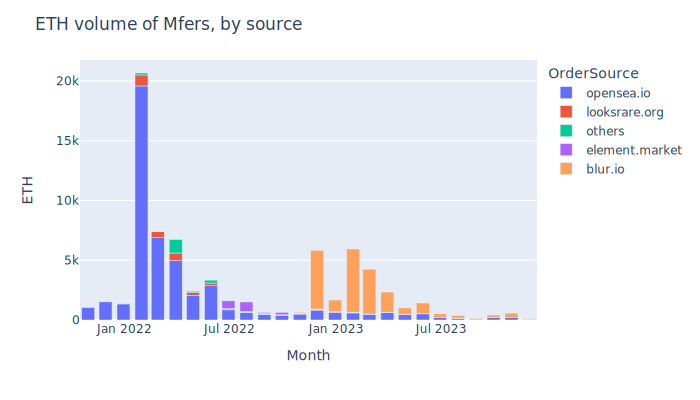

In [57]:
fig = px.bar(hischart, x='month', y='price.amount.decimal',
             color='OrderSource', height=400)
fig.update_layout(title='ETH volume of Mfers, by source',
                   xaxis_title='Month',
                   yaxis_title='ETH')
fig.show(fig.show(renderer="svg"))

Check arbitrage activities

In [81]:
a = pd.Series(np.repeat(np.nan,len(mfer)), index=mfer.index)
b = pd.Series(np.repeat(np.nan,len(mfer)), index=mfer.index)

for i in mfer['token.tokenId'].unique():
    a.loc[mfer[mfer['token.tokenId'] == i].index] = mfer[mfer['token.tokenId'] == i]['timestamp'].diff()
    b.loc[mfer[mfer['token.tokenId'] == i].index] = mfer[mfer['token.tokenId'] == i]['price.amount.decimal'].diff()
mfer['time_diff'] = a
mfer['profit'] = b

#There are some negative value due to the order of API, so take absolute value instead, 87 trades is True
Counter(abs(pd.to_timedelta(a)) < pd.to_timedelta('0 days 00:00:02')) 

<ipython-input-81-7d537dfef6af>:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<TimedeltaArray>
[NaT]
Length: 1, dtype: timedelta64[ns]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



Counter({False: 60753, True: 104})

In [82]:
bots = mfer[abs(pd.to_timedelta(mfer['time_diff'])) < pd.to_timedelta('0 days 00:00:02')]
bots['profit'].value_counts().head(4) #Too many 0 profit, not interested
bots= bots[bots['profit'] != 0]
bots['absolute profit'] = abs(bots['profit'])

In [83]:
bot_address = pd.concat([bots['from'], bots['to']])
bot_address.value_counts()

0xa1c2ff024c313088ac9ec47ec68c67b2b5478035    8
0x5c05177243a9d81caef1d4feab6750689d0363a6    5
0xc34349fbedd527215aae19b2e4626254ec29a13d    5
0x00000060bb1e57e3f1af1102f68db9fc2ee489bc    4
0x06a20913e78e0263f20b2591684546d50aa21a48    4
                                             ..
0x7c71c9e6309eca29219bb43dfd58cbbc3174c7b5    1
0x7b12c46fd8c6938475a095e30bfceccb8a417215    1
0xe64734836a37df1f92aca5f8f218f035340c0fd5    1
0x92437fa51f56399c18f465f474d81723a03cd326    1
0x000000073f53830ffad20fbd21faa99f642740cf    1
Name: count, Length: 143, dtype: int64

In [86]:
bots.shape

(98, 37)

In [55]:
bots[bots['absolute profit']> 0.01].head()

,orderSide,orderSource,orderKind,from,to,block,txHash,timestamp,washTradingScore,token.contract,...,shirt,short hair,smoke,type,month,mfers_type,OrderSource,time_diff,profit,absolute profit
2602,ask,opensea.io,wyvern-v2.3,0x58b54e6d8c5e14a3cb1ade3cbbcec05ecb02d5b9,0x50acf0ebe2b0851fbd63524494d7164b7f8c41a5,14814179.0,0x332b4295fc5debbafb2fe71e5941c90767caa5bb1787...,2022-05-21 00:26:46,0.0,0x79fcdef22feed20eddacbb2587640e45491b757f,...,NaN,NaN,cig white,plain mfer,2022-05,plain mfer,opensea.io,0 days 00:00:00,-0.07884,0.07884
3225,ask,x2y2.io,x2y2,0x1ba383587e6b6e8925bc2fff5d6165ab8a2eeaaf,0x24bd8305f6b062416059c9dfc249a6db724a79d4,16583725.0,0x1a90d3b72f0104af5fadf0adf91add4d2c698090e6e7...,2023-02-08 11:20:23,0.0,0x79fcdef22feed20eddacbb2587640e45491b757f,...,collared shirt blue,NaN,cig white,plain mfer,2023-02,plain mfer,others,0 days 00:00:00,-0.12550,0.12550
3631,ask,blur.io,blur,0x9a1c079b30ec04e75ebde8011669cbb840f177ba,0xc3231c4c54e2d0b51387a035c762a5b165d16371,16548670.0,0x324335ba4c13bf47051d06da073ccc9a469d123378d7...,2023-02-03 13:51:59,0.0,0x79fcdef22feed20eddacbb2587640e45491b757f,...,NaN,NaN,cig black,charcoal mfer,2023-02,charcoal mfer,blur.io,0 days 00:00:00,-0.13370,0.13370
4558,ask,opensea.io,wyvern-v2.3,0x1914d1bb7ed0b1e02570b2c459357db7259e3b59,0xef7f9d712a82ae54c6ece9d95b7e1ec7449747ed,14266632.0,0x5d2d9f8afc46c573885f1ef88f49a86e73a07f0ebb73...,2022-02-24 04:30:36,0.0,0x79fcdef22feed20eddacbb2587640e45491b757f,...,collared shirt blue,NaN,cig black,plain mfer,2022-02,plain mfer,opensea.io,0 days 00:00:00,-0.27090,0.27090
5196,ask,opensea.io,wyvern-v2.3,0x83c9cfbfadf83cdfbcccb81383ec2581f6c1e601,0x7358b8f966f17a2097c26d2219a2308b8d3e7c70,14935984.0,0x5a412f58ed01d449ef85fb635fa6f4f381e0228ae00a...,2022-06-10 02:25:00,0.0,0x79fcdef22feed20eddacbb2587640e45491b757f,...,NaN,NaN,cig white,charcoal mfer,2022-06,charcoal mfer,opensea.io,0 days 00:00:00,-0.05042,0.05042


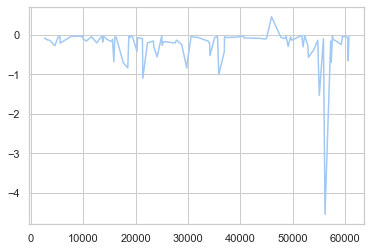

In [56]:
plt.plot(bots['profit'])

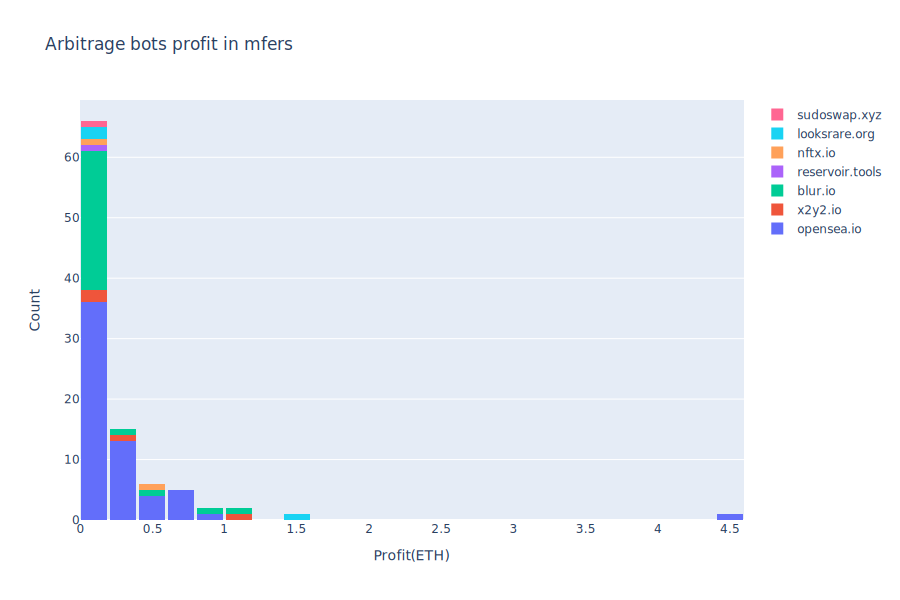

In [59]:
fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['absolute profit'], name= i ))
fig.update_layout(title_text = "Arbitrage bots profit in mfers", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show(renderer="svg")

In [87]:
fig = go.Figure()
for i in bots['orderSource'].unique():
    fig.add_trace(go.Histogram(x=bots[bots['orderSource']== i]['absolute profit'], name= i ))
fig.update_layout(title_text = "Arbitrage bots profit in mfers", 
                  width =900, height = 600, bargap= 0.1,
                  xaxis_title_text='Profit(ETH)', yaxis_title_text='Count',
                  barmode = 'stack'
                  )
fig.show()

In [60]:
#The 5 most profitable aribtrage trades in MAYC
bots[['from', 'to','txHash', 'timestamp','price.amount.usd', 'token.tokenId','absolute profit']].loc[bots.sort_values('absolute profit', ascending=False).index[:5]]

,from,to,txHash,timestamp,price.amount.usd,token.tokenId,absolute profit
56187,0xc3bc4a6e037ceca6691eb3cac7bf4df12cdea06f,0xe9d70204a5984b01253856180e79257d1d458489,0x9423f419689381da55b0a5217510a2dd9f64d9e19f01...,2022-01-31 22:45:13,1171.97190,9192,4.55100
55095,0x927705d26bd2aacfd0ed7492e8e21a86fecb4d1b,0x553eea17185e5ae6bb72f9528a4c3fc1a844b859,0x5ef4fb28792d06ae65c2ec7969ce654f4d5cc45945db...,2022-04-28 01:58:22,8957.73589,9048,1.52875
21374,0xffa0d3b8114af736a85d775a72339dd46255a7fb,0x40357bd6160f9bd57cbfceb8fcf282d87e7af6a0,0x4de70e19352e026cd25aee68df72b48419b5d0dda051...,2023-03-05 01:40:59,251.30691,3600,1.09708
35895,0x699b77191df264c86e832b081bd0eadb0f4e5578,0x8f44e22ac221cc25a46289d1c307d4f34a4dd6c2,0x6e20d7b71300a14b33ef559e72331e203af5a9838447...,2022-07-21 04:35:36,244.38623,5876,1.00000
29770,0x48425315431edd31402df52cde10c164922a1ef2,0x00000060bb1e57e3f1af1102f68db9fc2ee489bc,0xbecb59a94bd750597aceeb3d8299118d1c2649274f41...,2023-06-30 10:36:23,1186.20496,4916,0.83500


Analysis of active address

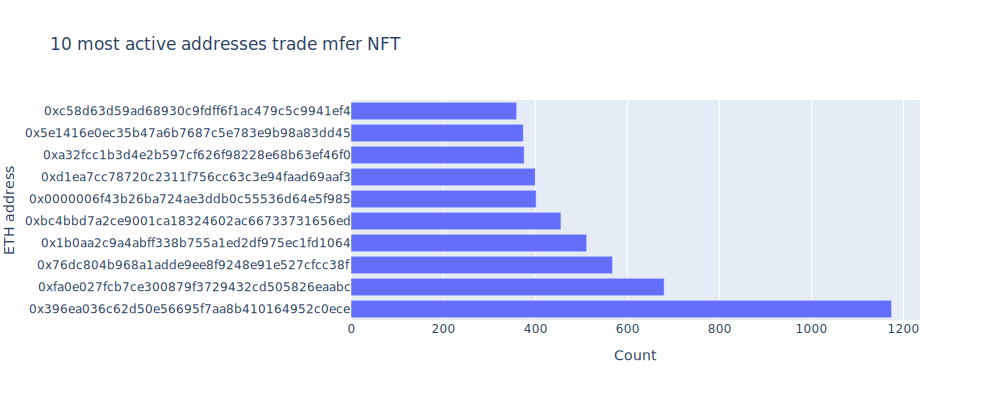

In [78]:

active = pd.concat((mfer['from'], mfer['to'])).value_counts()

#Address '0x020ca66c30bec2c4fe3861a94e4db4a498a35872' is in hot wallet address
active[1:11] #The first record is a mint address '0x0000000000000000000000000000000000000000'
fig = go.Figure()

fig.add_trace(go.Bar(y=active.index[1:11], x=active[1:11], name='contestant', orientation= 'h'))
fig.update_layout(title_text = "10 most active addresses trade mfer NFT", width=1000, height=400)
fig.update_yaxes(title_text="ETH address")
fig.update_xaxes(title_text="Count")
fig.show(renderer="svg")

In [80]:
#Address '0x020ca66c30bec2c4fe3861a94e4db4a498a35872' is in hot wallet address
active[1:11] #The first record is a mint address '0x0000000000000000000000000000000000000000'
fig = go.Figure()

fig.add_trace(go.Bar(y=active.index[1:11], x=active[1:11], name='contestant', orientation= 'h'))
fig.update_layout(title_text = "10 most active addresses trade mfer NFT", width=1000, height=400)
fig.update_yaxes(title_text="ETH address")
fig.update_xaxes(title_text="Count")
fig.show()

In [65]:
active[:11]

0x0000000000000000000000000000000000000000    9721
0x396ea036c62d50e56695f7aa8b410164952c0ece    1174
0xfa0e027fcb7ce300879f3729432cd505826eaabc     680
0x76dc804b968a1adde9ee8f9248e91e527cfcc38f     568
0x1b0aa2c9a4abff338b755a1ed2df975ec1fd1064     512
0xbc4bbd7a2ce9001ca18324602ac66733731656ed     456
0x0000006f43b26ba724ae3ddb0c55536d64e5f985     402
0xd1ea7cc78720c2311f756cc63c3e94faad69aaf3     400
0xa32fcc1b3d4e2b597cf626f98228e68b63ef46f0     376
0x5e1416e0ec35b47a6b7687c5e783e9b98a83dd45     374
0xc58d63d59ad68930c9fdff6f1ac479c5c9941ef4     360
Name: count, dtype: int64